In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('2014-2018_Station34_features.csv', index_col='timestamp', parse_dates=True)

In [4]:
df = df.iloc[5:] #edited since .ix is now deprecated.

In [16]:
#df = df.drop('total_docks', axis=1)

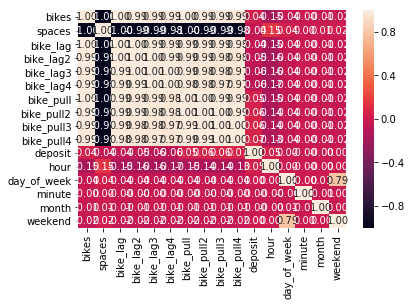

In [17]:
sns.heatmap(df.corr(), annot=True, fmt=".2f")

In [19]:
df.isnull().values.any()

False

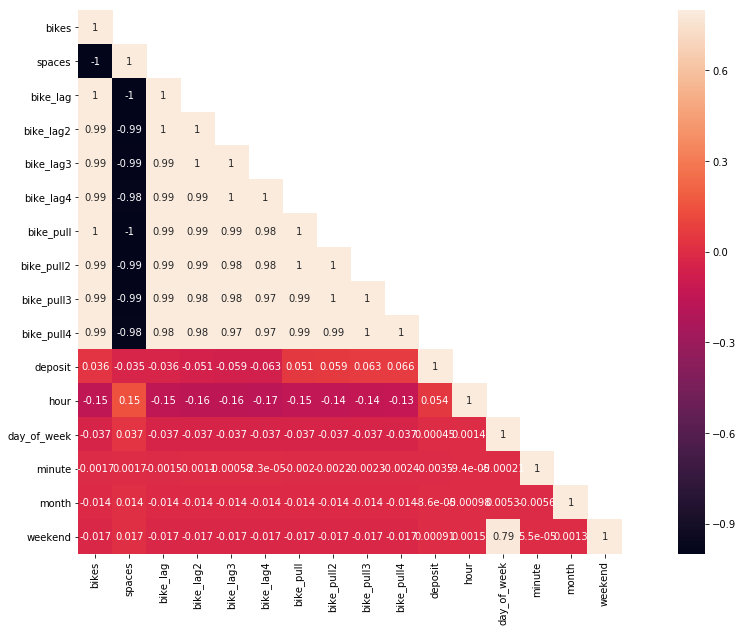

In [20]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [21]:
dfPivot = pd.pivot_table(df, values = "bikes", 
                             columns = "day_of_week", index = "hour")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f8c62b0>,
      dtype=object)

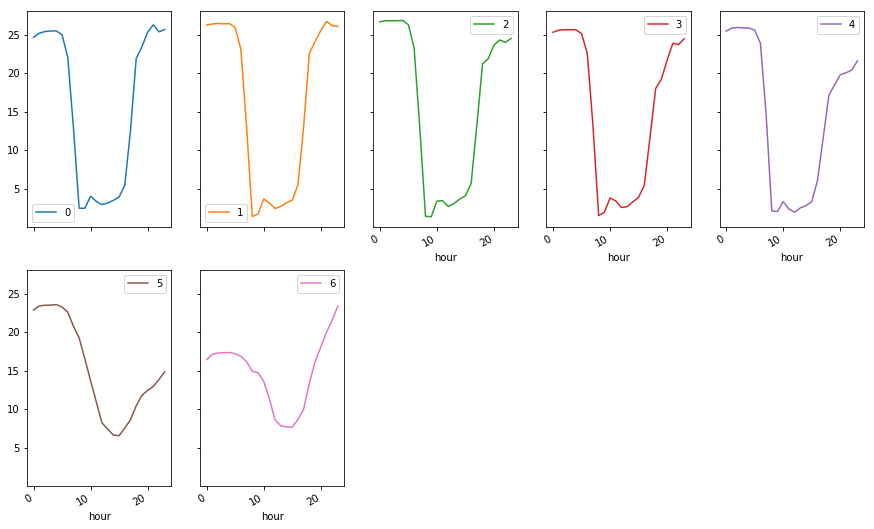

In [22]:
dfPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

In [23]:
dfPivot = pd.pivot_table(df, values = "bikes", 
                             columns = "day_of_week", index = "hour")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 963627 entries, 2014-06-28 00:50:01 to 2018-06-28 16:46:02
Data columns (total 17 columns):
bikes          963627 non-null int64
spaces         963627 non-null int64
bike_lag       963627 non-null int64
bike_lag2      963627 non-null int64
bike_lag3      963627 non-null int64
bike_lag4      963627 non-null int64
bike_pull      963627 non-null int64
bike_pull2     963627 non-null int64
bike_pull3     963627 non-null int64
bike_pull4     963627 non-null int64
deposit        963627 non-null int64
hour           963627 non-null int64
day_of_week    963627 non-null int64
minute         963627 non-null int64
month          963627 non-null int64
weekend        963627 non-null int64
time           963627 non-null object
dtypes: int64(16), object(1)
memory usage: 132.3+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a23225a20>,
      dtype=object)

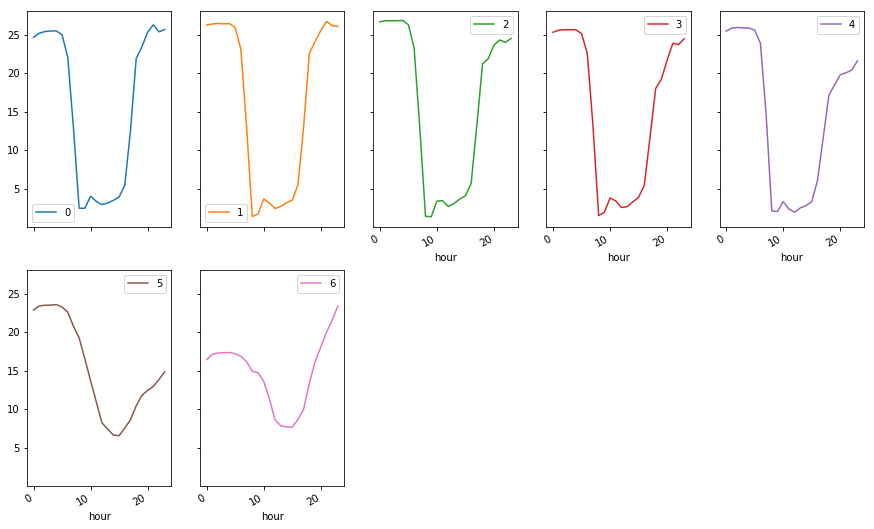

In [25]:
dfPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

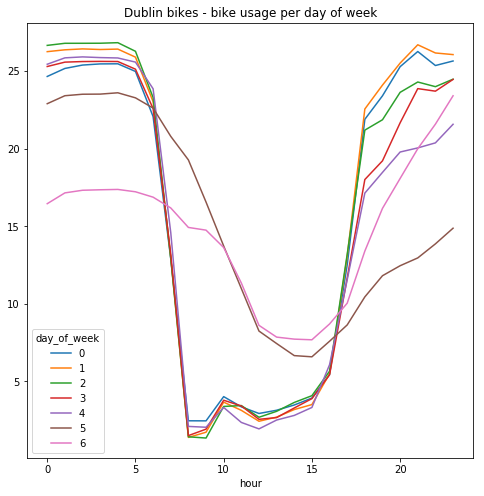

In [26]:
dfPivot.plot(subplots = False, figsize=(8, 8), layout=(3, 5), sharey=True, title="Dublin bikes - bike usage per day of week")

[Text(0,0.5,'bikes'),
 Text(0.5,0,'Bikes deposited'),
 Text(0.5,1,'count by bikes deposited')]

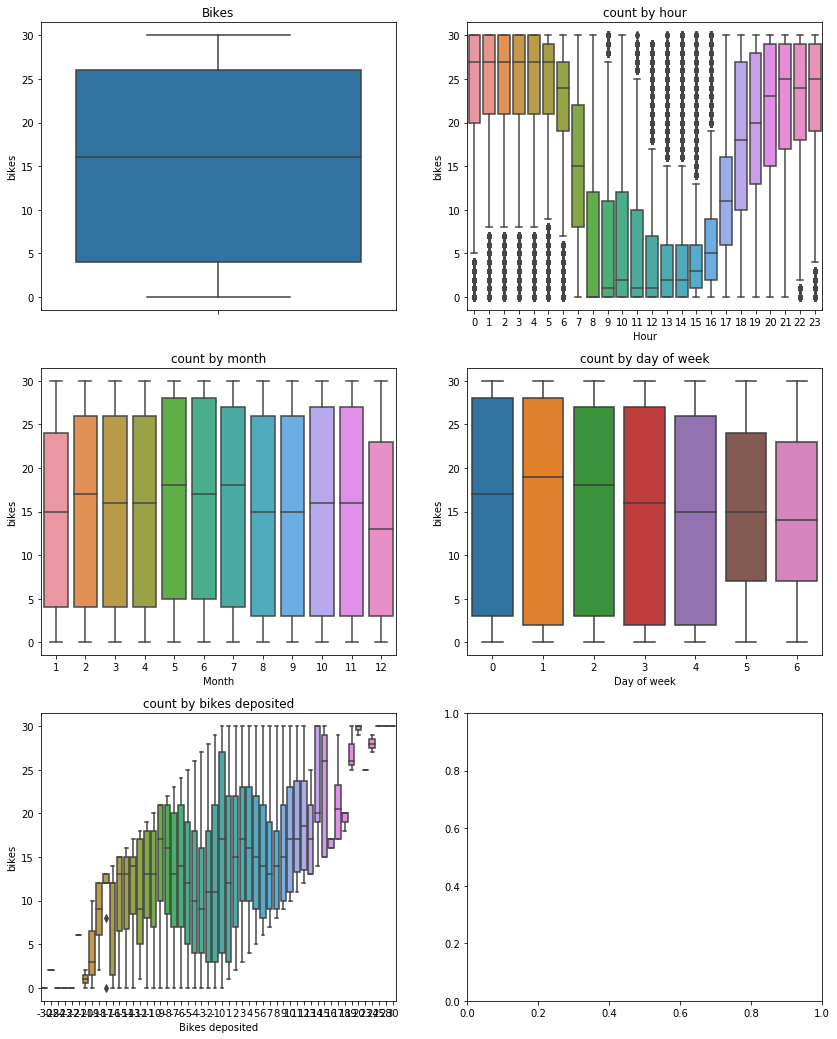

In [30]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(14, 18)
sns.boxplot(data=df, y="bikes", orient="v", ax=axes[0][0])
sns.boxplot(data=df, y="bikes", x="hour", orient="v", ax=axes[0][1])
sns.boxplot(data=df, y="bikes", x="month", orient="v", ax=axes[1][0])
sns.boxplot(data=df, y="bikes", x="day_of_week", orient="v", ax=axes[1][1])
sns.boxplot(data=df, y="bikes", x="deposit", orient="v", ax=axes[2][0])



axes[0][0].set(ylabel="bikes", title="Bikes")
axes[0][1].set(xlabel="Hour", ylabel="bikes", title="count by hour")
axes[1][0].set(xlabel="Month", ylabel="bikes", title="count by month")
axes[1][1].set(xlabel="Day of week", ylabel="bikes", title="count by day of week")
axes[2][0].set(xlabel="Bikes deposited", ylabel="bikes", title="count by bikes deposited")

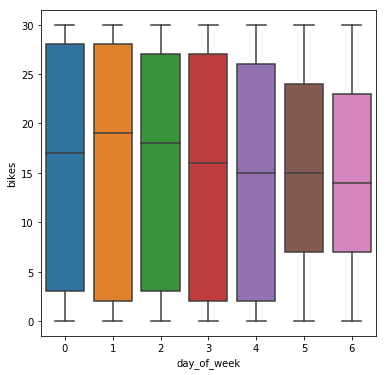

In [31]:

fig, ax = plt.subplots()
fig.set_size_inches(6, 6)
ax = sns.boxplot(data=df, y="bikes", x="day_of_week")

In [33]:
dfPivot = pd.pivot_table(df, values = "bikes", 
                             columns = ["day_of_week"], index = "hour")

In [34]:
dfPivot.head(2)

day_of_week,0,1,2,3,4,5,6
hour,,,,,,,
0,24.660252,26.259702,26.664058,25.302127,25.448413,22.903701,16.455620
1,25.177355,26.378814,26.799103,25.584217,25.860170,23.418268,17.151915


In [38]:
dfPivotMinute = pd.pivot_table(df, values = "bikes", 
                             columns = ["day_of_week"], index = "minute")

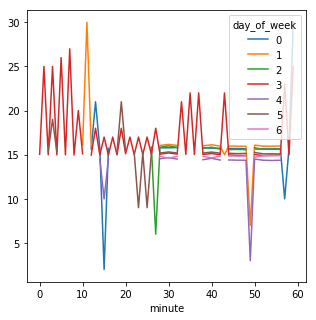

In [39]:
dfPivotMinute.plot(subplots = False, figsize=(5, 5), layout=(3, 5), sharey=True)


In [46]:
df.columns

Index(['bikes', 'spaces', 'bike_lag', 'bike_lag2', 'bike_lag3', 'bike_lag4',
       'bike_pull', 'bike_pull2', 'bike_pull3', 'bike_pull4', 'deposit',
       'hour', 'day_of_week', 'minute', 'month', 'weekend', 'time'],
      dtype='object')

In [80]:
dfPivot_means = pd.pivot_table(df, values = "deposit",
                             columns = "day_of_week", index = "hour")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c355240>,
      dtype=object)

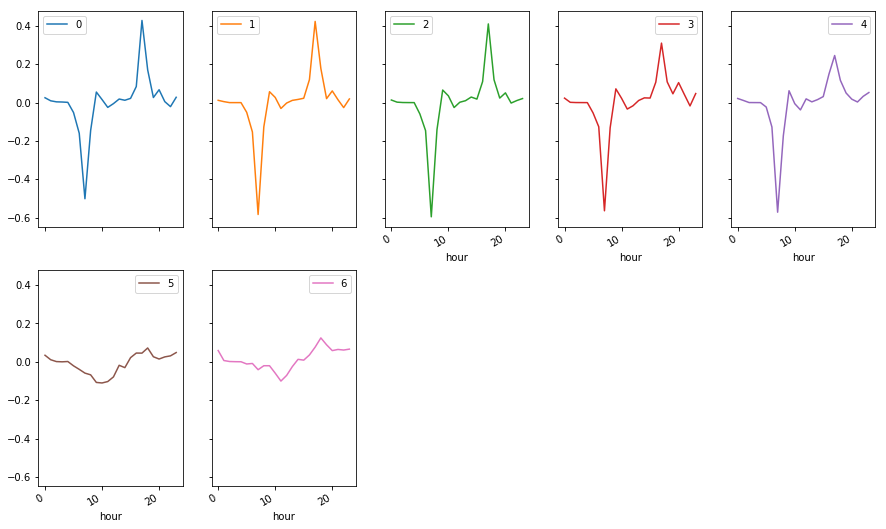

In [81]:
dfPivot_means.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

In [12]:
df['withdrawal_flag'] = df['bikes'].diff().fillna(0).astype(int) > 6

In [13]:
df.head(2)

,bikes,spaces,deposit,hour,day_of_week,month,weekend,time,withdrawal_flag
timestamp,,,,,,,,,
2014-06-28 00:50:01,30,0,1,0,5,6,1,00:50:01,False
2014-06-28 01:00:01,30,0,0,1,5,6,1,01:00:01,False


In [14]:
df['withdrawal_flag'] = df['withdrawal_flag'].astype(int)

In [5]:
df = df.drop('bike_lag',axis=1)
df = df.drop('bike_lag2',axis=1)
df = df.drop('bike_lag3',axis=1)
df = df.drop('bike_lag4',axis=1)

In [6]:
df = df.drop('bike_pull',axis=1)
df = df.drop('bike_pull2',axis=1)
df = df.drop('bike_pull3',axis=1)
df = df.drop('bike_pull4',axis=1)

In [8]:
df = df.drop('total_docks',axis=1)

In [9]:
df = df.drop('minute',axis=1)

In [24]:
df[ & df['withdrawal_flag']==1]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [81]:
x = df.loc[(df['weekend']==0) & df['deposit'] < 4] 

In [82]:
dfPivot = pd.pivot_table(x, values = "bikes", 
                             columns = "day_of_week", index = "hour")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a11f19cc0>,
      dtype=object)

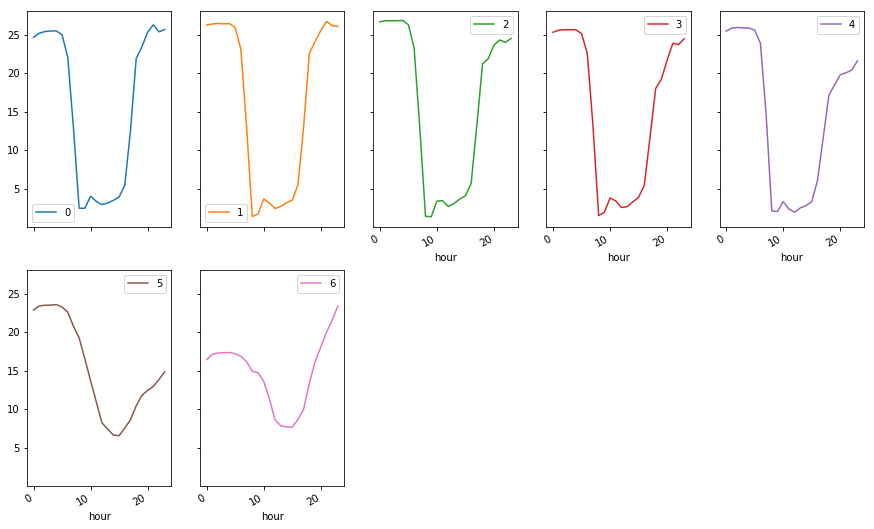

In [83]:
dfPivot.plot(subplots = True, figsize=(15, 15), layout=(3, 5), sharey=True)

In [84]:
x['deposit'].value_counts()

 0     783079
-1      71171
 1      66341
-2      14968
 2      13414
-3       3661
 3       3464
 4       1788
-4       1125
 5       1122
 6        863
-5        468
 7        395
-6        362
 8        256
-7        245
-8        203
-9        156
 9        113
-10        93
-11        55
 10        54
-12        45
 11        26
-13        22
 12        20
-15        19
-14        16
 14         9
-17         9
 17         8
 15         7
-16         7
-18         5
 13         5
 16         5
 30         3
 18         3
 19         3
 20         3
-19         3
 24         2
-20         2
 23         1
 25         1
-30         1
-28         1
-24         1
-23         1
-22         1
-21         1
 28         1
Name: deposit, dtype: int64

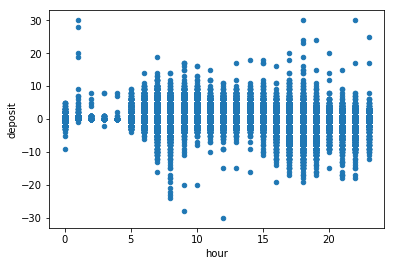

In [69]:
x.plot.scatter('hour', 'deposit')

In [54]:
x.columns

Index(['bikes', 'spaces', 'deposit', 'hour', 'day_of_week', 'month', 'weekend',
       'time', 'withdrawal_flag'],
      dtype='object')